In [1]:
# Import required modules
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
training_df = pd.read_csv('training.csv')

In [10]:
training_df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
# Exploring relationship of predictors with target
def determine_significant_predictors(corr, threshold):
    '''
    Check if predictor has a significant correleation.
    '''
    if abs(corr) > threshold:
        return corr
    
threshold = 0.4 # Correlation strength threshold
critical_temp_corr = training_df.corr().critical_temp[:-1].apply(lambda x: determine_significant_predictors(x, threshold))
critical_temp_corr.dropna(inplace=True)
critical_temp_corr = pd.DataFrame(critical_temp_corr)
print("Predictors that appear to have a strong correlation with critical_temp are given below - \n{}\n".format(critical_temp_corr))
print("Number of predictors that have a strong correlation (positive or negative) with the critical_temp = {}".format(len(critical_temp_corr)))


Predictors that appear to have a strong correlation with critical_temp are given below - 
                               critical_temp
number_of_elements                  0.615219
entropy_atomic_mass                 0.556813
wtd_entropy_atomic_mass             0.637393
range_atomic_mass                   0.508886
entropy_fie                         0.582543
wtd_entropy_fie                     0.421215
range_fie                           0.624973
std_fie                             0.562077
wtd_std_fie                         0.588553
wtd_gmean_atomic_radius            -0.406053
entropy_atomic_radius               0.573012
wtd_entropy_atomic_radius           0.615940
range_atomic_radius                 0.660010
std_atomic_radius                   0.566789
wtd_std_atomic_radius               0.601641
wtd_mean_Density                   -0.435601
gmean_Density                      -0.550491
wtd_gmean_Density                  -0.544624
entropy_Density                     0.469363
wtd_entrop

In [9]:
# Exploring ranges of predictors and target to determine if normalization is required
training_df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,...,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000
mean,4.114791,87.536722,72.437753,71.212676,57.929775,1.164417,1.063735,115.696530,32.978849,44.381459,...,3.115813,3.040827,3.025329,1.295717,1.051823,1.983122,1.466370,0.819400,0.650826,35.395596
std,1.450853,29.585543,33.482586,30.823041,36.655334,0.369230,0.407409,54.917901,27.188775,20.077931,...,1.192319,1.050186,1.178303,0.397954,0.384615,1.209605,0.983832,0.476508,0.442325,34.545494
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.816957,51.993230,58.600289,35.159634,0.960058,0.759986,78.175709,16.521879,32.890369,...,2.111538,2.213364,2.086319,1.060857,0.762286,1.000000,0.913043,0.433013,0.300000,5.800000
50%,4.000000,85.097080,59.868821,66.361592,38.532180,1.199541,1.149468,122.906070,26.205278,45.256500,...,2.550562,2.605171,2.370680,1.368922,1.179587,2.000000,1.058824,0.800000,0.489898,21.000000
75%,5.000000,100.351275,84.837581,77.731103,72.377536,1.444537,1.367618,155.006000,38.087424,59.636840,...,4.000000,3.662842,3.888834,1.589027,1.332245,3.000000,1.857143,1.166190,1.000000,65.500000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,143.000000


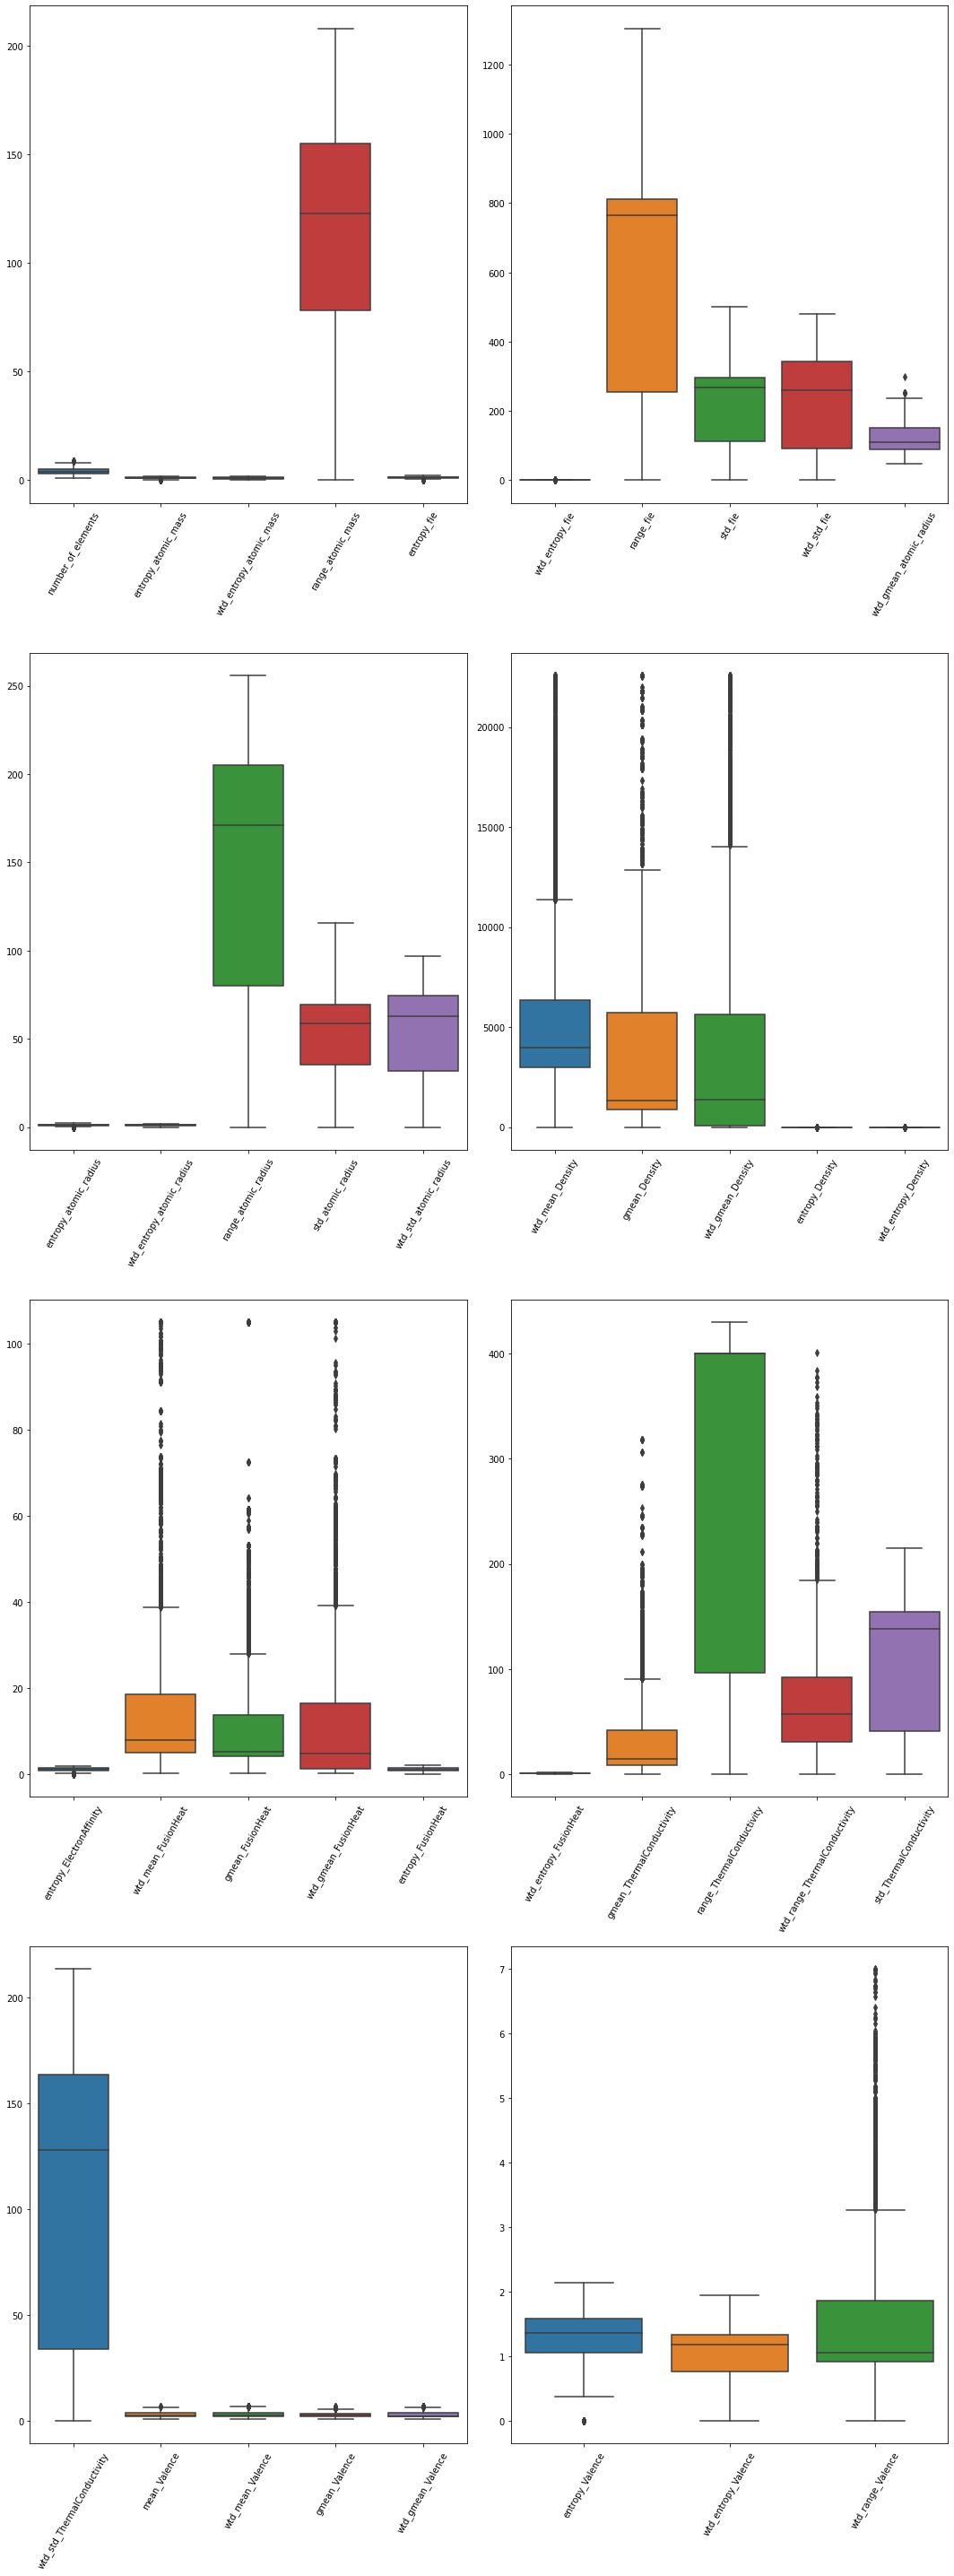

In [6]:
# Exploring whether the predictors had a significant number of outliers
predictors_of_interest = critical_temp_corr.index.tolist()
plot_num = 1
plt.subplots(figsize=(15, 40))
for i in range(0,len(predictors_of_interest), 5):
    plt.subplot(4,2, plot_num)
    plt.xticks(rotation=60)
    plt.tight_layout()
    predictors = predictors_of_interest[i:i+5]
    sns.boxplot(data=training_df[predictors])
    plot_num+=1

plt.savefig('predictor_boxplots.png')
plt.show()

In [7]:
# Conclusions:
# 1. A lot of noise exists in dataset therefore, dimensionality reduction and normalization required.
# 2. Many outliers for predictors, therefore, model to be chosen must be robust to outliers.
# 3. Vastly different ranges of predictors, therefore, normalization required.
# 4. Several predictors do not seem to strongly affect the target, therefore, dimensionality reduction required.
